In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Mall Customer data**
- sepnding score between 1-100
- more spending score means valuable customer 
- income and spending score are the important columns
- group the data based on spending score and income 

In [76]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Naresh IT Class\Data Files\Mall_Customers.csv")

In [77]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
df.isnull().mean()

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [79]:

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [80]:
df.shape

(200, 5)

In [81]:
x = df.iloc[:,[3,4]].values
# spending_score = df['Spending Score (1-100)'].values

In [82]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [83]:
# scatter plot
# plt.scatter(df['Annual Income (k$)'])

### K- Means
- we need 

#### Firest check for one cluster to understand 

In [84]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [85]:
k_means_1 = KMeans(n_clusters=1, max_iter=300, random_state=1234)
k_means_1

KMeans(n_clusters=1, random_state=1234)

In [86]:
k_means_1.fit(x)

KMeans(n_clusters=1, random_state=1234)

In [87]:
k_means_1.inertia_  # WCSS

269981.28

In [88]:
k_means_1.cluster_centers_

array([[60.56, 50.2 ]])

In [89]:
x[:,0].mean(),x[:,1].mean()

(60.56, 50.2)

In [90]:
inertia_list = []
for i in range(1,21):
    k_means_1 = KMeans(n_clusters=i, max_iter=300, random_state=1234)
    k_means_1.fit(x)
    inertia_list.append(k_means_1.inertia_)
    

In [91]:
inertia_list

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25062.433792653785,
 21830.041978049438,
 19786.84765212151,
 17515.872164701657,
 16036.883346746634,
 14320.918182339483,
 13078.420560537024,
 11868.708248175972,
 10929.424546767576,
 10069.837762237763,
 9433.113986013987,
 8768.73151848152,
 8154.660713628477]

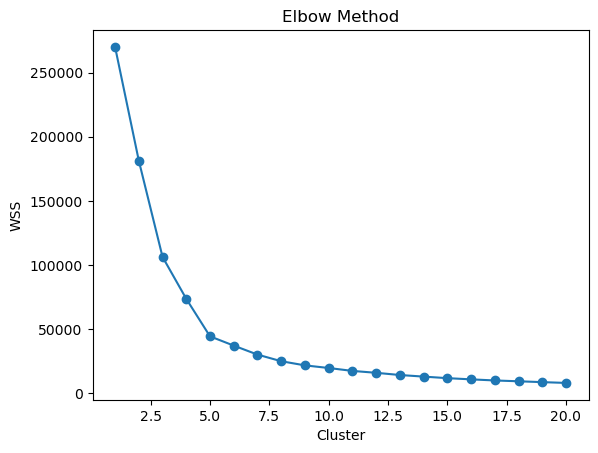

In [112]:
plt.scatter(range(1,21),inertia_list)
plt.plot(range(1,21),inertia_list)
plt.title('Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('WSS')
plt.show()

In [93]:
k_means_2 = KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_cluster = k_means_2.fit_predict(x)
y_cluster



array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [94]:
df['Cluster'] = y_cluster

In [95]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [96]:
df['Cluster'].value_counts()

Cluster
4    81
1    39
3    35
0    23
2    22
Name: count, dtype: int64

In [97]:
cluster_1_mean = df[df['Cluster'] == 0][['Annual Income (k$)','Spending Score (1-100)']].mean()

In [98]:
cluster_2_mean = df[df['Cluster'] == 1][['Annual Income (k$)','Spending Score (1-100)']].mean()

In [99]:
cluster_3_mean = df[df['Cluster'] == 2][['Annual Income (k$)','Spending Score (1-100)']].mean()

In [100]:
cluster_4_mean = df[df['Cluster'] == 3][['Annual Income (k$)','Spending Score (1-100)']].mean()

In [101]:
cluster_5_mean = df[df['Cluster'] == 4][['Annual Income (k$)','Spending Score (1-100)']].mean()

- We need the data
- We selected specific columns
-  We given randomly 10 cluster
- We calcuated the inertia of 10 cluster
- By using elbow method, we decided 5 clusters are enough
- we pass the 5 clusters to the k-means
- we pass the data (X) and the get cluster values for all observations
- We divided into 5 data frame w.r.t the cluster observations
- We calculated Average income and Average spending score of each cluster observation

In [102]:
df1 = {
    "cluster 1": cluster_1_mean,
    "cluster 2": cluster_2_mean,
    "cluster 3": cluster_3_mean,
    "cluster 4": cluster_4_mean,
    "cluster 5": cluster_5_mean,

}

In [103]:
pd.DataFrame(df1)

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
Annual Income (k$),26.304348,86.538462,25.727273,88.200000,55.296296
Spending Score (1-100),20.913043,82.128205,79.363636,17.114286,49.518519


In [105]:
x[y_cluster==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

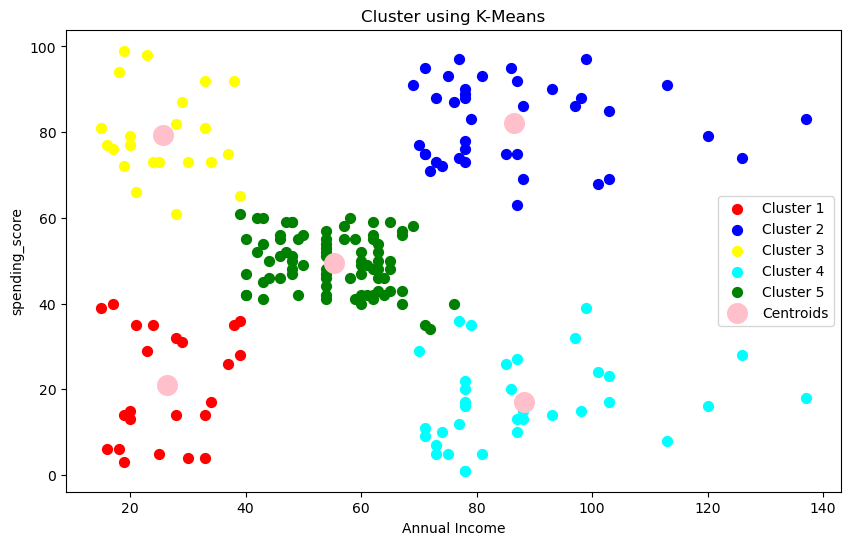

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_cluster==0,0], x[y_cluster==0,1], s=50, c='red',label='Cluster 1')
plt.scatter(x[y_cluster==1,0], x[y_cluster==1,1], s=50, c='blue',label='Cluster 2')
plt.scatter(x[y_cluster==2,0], x[y_cluster==2,1], s=50, c='yellow',label='Cluster 3')
plt.scatter(x[y_cluster==3,0], x[y_cluster==3,1], s=50, c='cyan',label='Cluster 4')
plt.scatter(x[y_cluster==4,0], x[y_cluster==4,1], s=50, c='green',label='Cluster 5')
plt.scatter(k_means_2.cluster_centers_[:,0],k_means_2.cluster_centers_[:,1],s=200,c='pink',label="Centroids")
plt.title('Cluster using K-Means')
plt.xlabel('Annual Income')
plt.ylabel('spending_score')
plt.legend()
plt.show()

### Silhouette Score
- Silhouette Score = (b-a)/max(a,b)

#### WCSS ?